import necessary libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
DataFrame = pd.read_csv('data/weather.csv')
DataFrame.head()

,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,20170312,71.06,87.08,80.06,4.473880,360.0,21.027236,0.0,0.0,0.0
1,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,20170404,77.00,86.00,NaN,8.947760,360.0,23.040482,NaN,NaN,0.0
2,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,20170420,NaN,NaN,NaN,8.500372,360.0,21.922012,NaN,NaN,0.0
3,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,20170120,69.08,82.04,NaN,3.355410,360.0,17.000744,0.0,0.0,0.0
4,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,20170217,73.04,87.08,NaN,4.697574,360.0,19.908766,0.0,0.0,0.0


check if there are any null values

In [18]:
DataFrame.shape

(416937, 15)

In [19]:
DataFrame.describe()

,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP
count,416937.000000,416937.000000,416937.000000,4.169370e+05,415593.000000,415664.000000,259038.000000,234880.000000,226115.000000,226175.000000,135109.000000,312442.000000,414965.000000
mean,41.293931,-104.599374,1148.669856,2.017050e+07,41.790790,62.801081,47.541197,8.142031,202.023612,24.811372,0.049699,15.069284,0.112710
std,7.003117,20.440668,1072.908538,2.494075e+02,18.926374,21.061005,18.598894,6.746946,98.377489,8.964207,0.536061,28.410950,0.328695
min,13.483600,-170.222200,-36.000000,2.017010e+07,-147.820000,-147.820000,-147.820000,0.000000,2.000000,4.026492,0.000000,0.000000,0.000000
25%,37.610000,-116.450000,162.800000,2.017031e+07,29.660000,46.760000,34.340000,4.921268,130.000000,18.119214,0.000000,0.000000,0.000000
50%,41.254400,-109.240000,789.400000,2.017051e+07,42.980000,66.020000,48.740000,6.934514,210.000000,23.040482,0.000000,0.000000,0.000000
75%,44.866400,-90.251100,2130.600000,2.017072e+07,55.040000,79.700000,61.340000,10.066230,290.000000,29.974996,0.000000,22.007886,0.098425
max,71.283300,145.716700,3541.800000,2.017092e+07,98.960000,261.680000,120.560000,112.518082,360.000000,180.073670,67.992163,280.000151,26.031510


In [20]:
DataFrame.isnull().sum()

station           0
state             0
latitude          0
longitude         0
elevation         0
date              0
TMIN           1344
TMAX           1273
TAVG         157899
AWND         182057
WDF5         190822
WSF5         190762
SNOW         281828
SNWD         104495
PRCP           1972
dtype: int64

As we can see, there are multiple rows missing data about the temperature and wind speed of that day, moreover, there are rows that contain outlier data or even being duplicates. We will have to do data cleaning process before visualization to avoid error.

In [21]:
#delete duplicates
DataFrame = DataFrame.drop_duplicates()
#

split the dataframe to smaller dataframe based on the state

In [22]:
unique_states_series = pd.Series(DataFrame['state'].unique(), name="Unique States")
unique_states_series

0     GU
1     PR
2     MT
3     CO
4     TX
      ..
59    QC
60    NB
61    NS
62    PE
63    NL
Name: Unique States, Length: 64, dtype: object

understand the correlation
1. positive correlation
2. negative correlation

<Axes: >

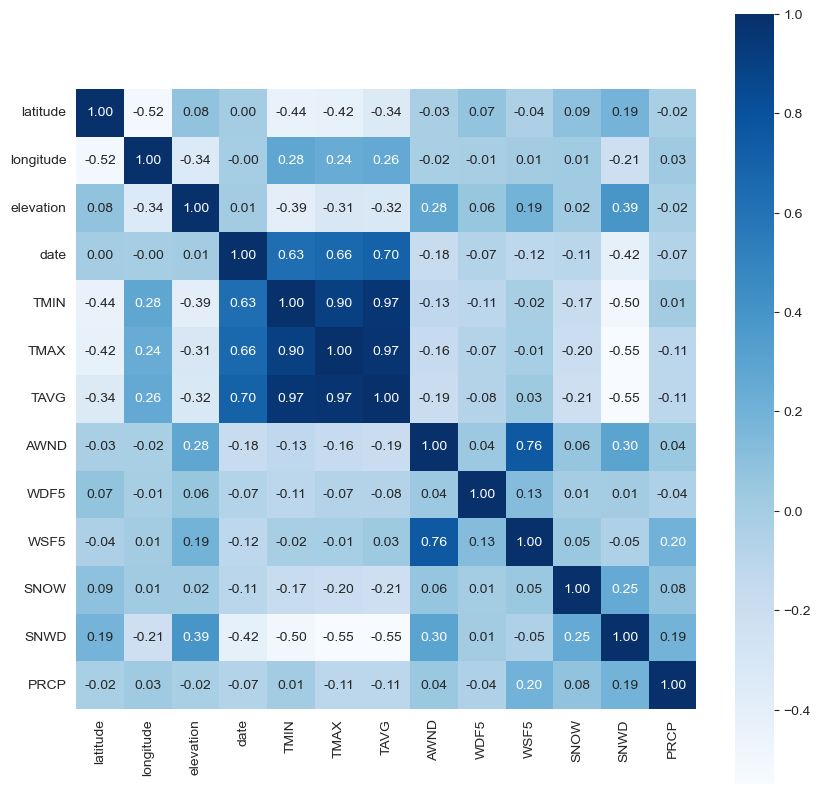

In [23]:
correlation = DataFrame.drop(columns=['station','state']).corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation, annot=True, annot_kws={"size": 10}, cmap='Blues', square=True, fmt='.2f')

looks like there are some positive correlation between the temperature and snow depth

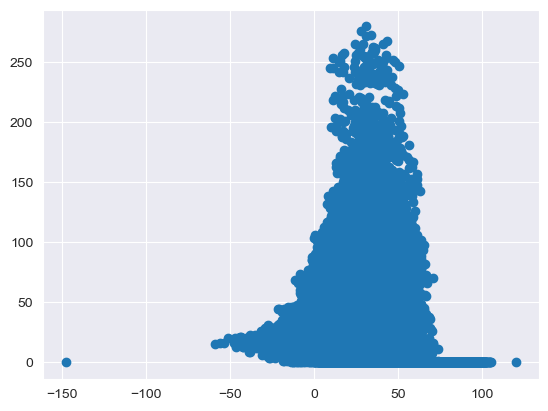

In [24]:
plt.plot(DataFrame.TAVG, DataFrame.SNWD, 'o')
